In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# Load the CSV dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/695WS/adult.csv')

In [ ]:
# Check for Null Data
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

education
educational-num
relationship


In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
feature = 'education'
print(sorted(list(df[feature].unique())))
print(len(list(df[feature].unique())))
ax = sns.catplot(x = feature,y= 'income' ,data = df, kind="bar")
ax.set_xticklabels(rotation=90)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
16


In [ ]:
feature = 'marital-status'
print(sorted(list(df[feature].unique())))
print(len(list(df[feature].unique())))
ax = sns.catplot(x = feature,y= 'income' ,data = df,kind="bar")
ax.set_xticklabels(rotation=90)

In [ ]:
# Convert Sex value to 0 and 1
df['gender'] = df['gender'].map({'Male': 0, 'Female':1})

In [ ]:
# Create Married Column - Binary Yes(1) or No(0)
df["marital-status"] = df["marital-status"].replace(['Never-married','Divorced','Separated','Widowed','Married-spouse-absent'], 0)
df["marital-status"] = df["marital-status"].replace(['Married-civ-spouse','Married-AF-spouse'], 1)

# Create Realtionship Column - Binary Yes(1) or No(0)
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 1)
df['relationship'] = df['relationship'].replace(['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried'], 0)

In [ ]:
# Create Realtionship Column - Binary Yes(1) or No(0)
df['relationship'] = df['relationship'].replace(['Husband', 'Wife'], 1)
df['relationship'] = df['relationship'].replace(['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried'], 0)

In [ ]:
# Drop the data you don't want to use
df.drop(labels=["workclass","education","occupation","race","native-country"], axis = 1, inplace = True)

In [ ]:
df.head()

age  fnlwgt  educational-num  marital-status  relationship  gender  \
0   25  226802                7               0             0       0   
1   38   89814                9               1             1       0   
2   28  336951               12               1             1       0   
3   44  160323               10               1             1       0   
4   18  103497               10               0             0       1   

   capital-gain  capital-loss  hours-per-week  income  
0             0             0              40       0  
1             0             0              50       0  
2             0             0              40       1  
3          7688             0              40       1  
4             0             0              30       0

In [ ]:
# Split the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
seed = 7
num_folds = 10
scoring = 'f1'

In [ ]:
# Tune Random Forest
n_estimators = np.array([150, 200, 250, 300])
max_features = np.array([3, 4,5, 6])

param_grid = dict(n_estimators=n_estimators,max_features=max_features)

model = RandomForestClassifier()

kfold = KFold(n_splits=num_folds)#, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(X, y)#grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.680580 using {'max_features': 6, 'n_estimators': 200}
0.677584 (0.009512) with: {'max_features': 3, 'n_estimators': 150}
0.679050 (0.012960) with: {'max_features': 3, 'n_estimators': 200}
0.677928 (0.011364) with: {'max_features': 3, 'n_estimators': 250}
0.677539 (0.010015) with: {'max_features': 3, 'n_estimators': 300}
0.678878 (0.012403) with: {'max_features': 4, 'n_estimators': 150}
0.676892 (0.011352) with: {'max_features': 4, 'n_estimators': 200}
0.677811 (0.011480) with: {'max_features': 4, 'n_estimators': 250}
0.680121 (0.011861) with: {'max_features': 4, 'n_estimators': 300}
0.677830 (0.010320) with: {'max_features': 5, 'n_estimators': 150}
0.677533 (0.011457) with: {'max_features': 5, 'n_estimators': 200}
0.679697 (0.011388) with: {'max_features': 5, 'n_estimators': 250}
0.679133 (0.012598) with: {'max_features': 5, 'n_estimators': 300}
0.677762 (0.010480) with: {'max_features': 6, 'n_estimators': 150}
0.680580 (0.009145) with: {'max_features': 6, 'n_estimators': 200}


In [ ]:
# Encode categorical variables as numeric values
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Split the dataset into features and target variable
X = df.drop('income', axis=1)
y = df['income']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Create a decision tree classifier with default hyperparameters
# dtc = DecisionTreeClassifier(criterion='entropy')
dtc = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=2)

# Train the decision tree classifier on the training set
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Evaluate the performance of the decision tree classifier
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion matrix:\n", confusion)

# Visualize the decision tree using Graphviz
# dot_data = export_graphviz(dtc, out_file=None, 
#                            feature_names=X.columns,  
#                            class_names=y.unique(),  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("decision_tree")  # Save the decision tree as a PDF file

Accuracy: 0.8565871634763026
Confusion matrix:
 [[7175  299]
 [1102 1193]]


In [ ]:
for i in range(2,15):

  dtc = DecisionTreeClassifier(max_depth=i)
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)
  print(i)
  print("Accuracy:", accuracy*100)
  print("Confusion matrix:\n", confusion)

2
Accuracy: 82.7515610604975
Confusion matrix:
 [[7153  321]
 [1364  931]]
3
Accuracy: 83.83662606203296
Confusion matrix:
 [[7152  322]
 [1257 1038]]
4
Accuracy: 84.24608455317842
Confusion matrix:
 [[7092  382]
 [1157 1138]]
5
Accuracy: 85.19807554509161
Confusion matrix:
 [[7118  356]
 [1090 1205]]
6
Accuracy: 85.38233186610708
Confusion matrix:
 [[7161  313]
 [1115 1180]]
7
Accuracy: 85.56658818712253
Confusion matrix:
 [[7158  316]
 [1094 1201]]
8
Accuracy: 85.5870611116798
Confusion matrix:
 [[7162  312]
 [1096 1199]]
9
Accuracy: 85.55635172484389
Confusion matrix:
 [[7162  312]
 [1099 1196]]
10
Accuracy: 85.42327771522163
Confusion matrix:
 [[7153  321]
 [1103 1192]]
11
Accuracy: 85.77131743269526
Confusion matrix:
 [[6893  581]
 [ 809 1486]]
12
Accuracy: 85.29020370559934
Confusion matrix:
 [[6836  638]
 [ 799 1496]]
13
Accuracy: 85.18783908281297
Confusion matrix:
 [[6852  622]
 [ 825 1470]]
14
Accuracy: 84.66577950660252
Confusion matrix:
 [[6904  570]
 [ 928 1367]]


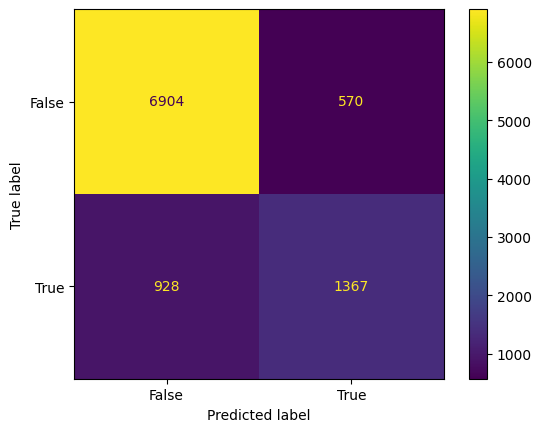

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

cm_display.plot()
plt.show(cm_display)

# cm = confusion#_matrix(y_test, y_pred)
# cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# # create a figure and axes objects
# fig, ax = plt.subplots()

# # plot the confusion matrix with shaded colors
# im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# # add colorbar
# cbar = ax.figure.colorbar(im, ax=ax)

In [ ]:
# # Convert integer columns to strings
# int_cols = [col for col in df.columns if df[col].dtype == 'int64']
# for col in int_cols:
#     df[col] = df[col].astype(str)

# # Split the dataset into features and target variable
# X = df.drop('income', axis=1)
# y = df['income']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a decision tree classifier with default hyperparameters
# dtc = DecisionTreeClassifier()

# # Train the decision tree classifier on the training set
# dtc.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = dtc.predict(X_test)

# # Evaluate the performance of the decision tree classifier
# accuracy = accuracy_score(y_test, y_pred)
# confusion = confusion_matrix(y_test, y_pred)

# # Print the accuracy and confusion matrix
# print("Accuracy:", accuracy)
# print("Confusion matrix:\n", confusion)

# # Visualize the decision tree using Graphviz
# dot_data = export_graphviz(dtc, out_file=None, 
#                            feature_names=X.columns,  
#                            class_names=y.unique(),  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("decision_tree")  # Save the decision tree as a PDF file


In [ ]:
tree_text = export_text(dtc, feature_names=list(X_train.columns))
print(tree_text)

|--- relationship <= 0.50
|   |--- educational-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- educational-num <= 8.50
|   |   |   |   |--- hours-per-week <= 49.50
|   |   |   |   |   |--- capital-loss <= 1794.00
|   |   |   |   |   |   |--- occupation <= 9.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- occupation >  9.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- capital-loss >  1794.00
|   |   |   |   |   |   |--- capital-loss <= 1989.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- capital-loss >  1989.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- hours-per-week >  49.50
|   |   |   |   |   |--- age <= 43.50
|   |   |   |   |   |   |--- workclass <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- workclass >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  43.50
|   |   |   |   |   |   |--- hours-per-week <= 53.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create the decision tree classifier with default hyperparameters
clf = DecisionTreeClassifier()

# define the hyperparameters to search over
hyperparameters = {'max_depth': [5, 6, 7, 8, 10], 
                   'min_samples_split': [1, 2, 3, 4],
                   'min_samples_leaf': [1, 2, 3, 4, 5]}

# perform grid search with cross-validation
grid_search = GridSearchCV(clf, hyperparameters, cv=5)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
test_score = grid_search.score(X_test, y_test)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Test score: ", test_score)

Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.8561152849823659
Test score:  0.8560753403623708


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_